In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import data generated by MACD with HEAAN Library and apple stock prices
df_macd = pd.read_csv('data/macd_heaan.csv', names=['Price'], header=None)
macd = df_macd.Price.tolist()

df_wma12 = pd.read_csv('data/wma12_heaan.csv', names=['Price'], header=None)
wma12 = df_wma12.Price.tolist()

df_wma26 = pd.read_csv('data/wma26_heaan.csv', names=['Price'], header=None)
wma26 = df_wma26.Price.tolist()

df_wmadiff = pd.read_csv('data/wma_diff_heaan.csv', names=['Price'], header=None)
wma_diff = df_wmadiff.Price.tolist()

df_wma9 = pd.read_csv('data/wma9_heaan.csv', names=['Price'], header=None)
wma9 = df_wma9.Price.tolist()

df_decisions = pd.read_csv('data/decisions_heaan.csv', names=['Decision'], header=None)
df_decisions = df_decisions[df_decisions['Decision'] < 5]
df_decisions = df_decisions[df_decisions['Decision'] > -5]
decisions = df_decisions.Decision.tolist()

df_apple = pd.read_csv('data/apple_prices.csv', names=['Price'], header=None)
apple = df_apple.Price.tolist()

# Ensure every list has the same length for comparison
wma12 = wma12[9:]
wma26 = wma26[9:]
apple = apple[35:(35+len(wma9))]

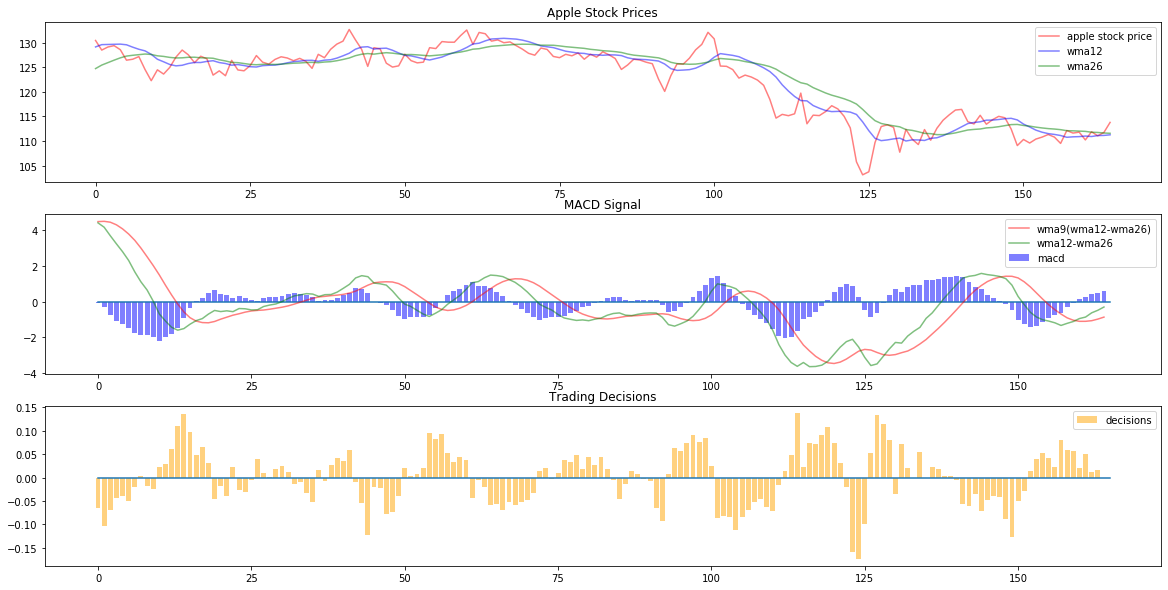

In [3]:
# Plot the windowed moving averages, apple stock prices and trading decisions
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize = (20, 10))
x_range = np.arange(0, len(macd), 1)
x_range2 = np.arange(0, len(decisions), 1)
x, y = [0, len(macd)], [0, 0]

ax1.plot(apple, color='red', alpha=0.5, label='apple stock price')
ax1.plot(wma12, color='blue', alpha=0.5, label='wma12')
ax1.plot(wma26, color='green', alpha=0.5, label='wma26')
ax1.set_title('Apple Stock Prices')
ax1.legend()

ax2.plot(x, y)
ax2.bar(x_range, macd, color='blue', alpha=0.5, label='macd')
ax2.plot(wma9, color='red', alpha=0.5, label='wma9(wma12-wma26)')
ax2.plot(wma_diff, color='green', alpha=0.5, label='wma12-wma26')
ax2.set_title('MACD Signal')
ax2.legend()

ax3.bar(x_range2, decisions, color='orange', alpha=0.5, label='decisions')
ax3.plot(x, y)
ax3.set_title('Trading Decisions')
ax3.legend()

plt.show()